In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Avinash\Desktop\Projects\P4=abalone\abalone.csv")
df.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [3]:
df.shape

(4177, 9)

In [4]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

# EDA

In [5]:
from pandas_profiling import ProfileReport
profile=ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Changing Sex to numeric Data

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
df["Sex"]=le.fit_transform(df.Sex)

In [31]:
df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       2   0.455     0.365   0.095        0.5140          0.2245   
1       2   0.350     0.265   0.090        0.2255          0.0995   
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       2   0.440     0.365   0.125        0.5160          0.2155   
4       1   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    0   0.565     0.450   0.165        0.8870          0.3700   
4173    2   0.590     0.440   0.135        0.9660          0.4390   
4174    2   0.600     0.475   0.205        1.1760          0.5255   
4175    0   0.625     0.485   0.150        1.0945          0.5310   
4176    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

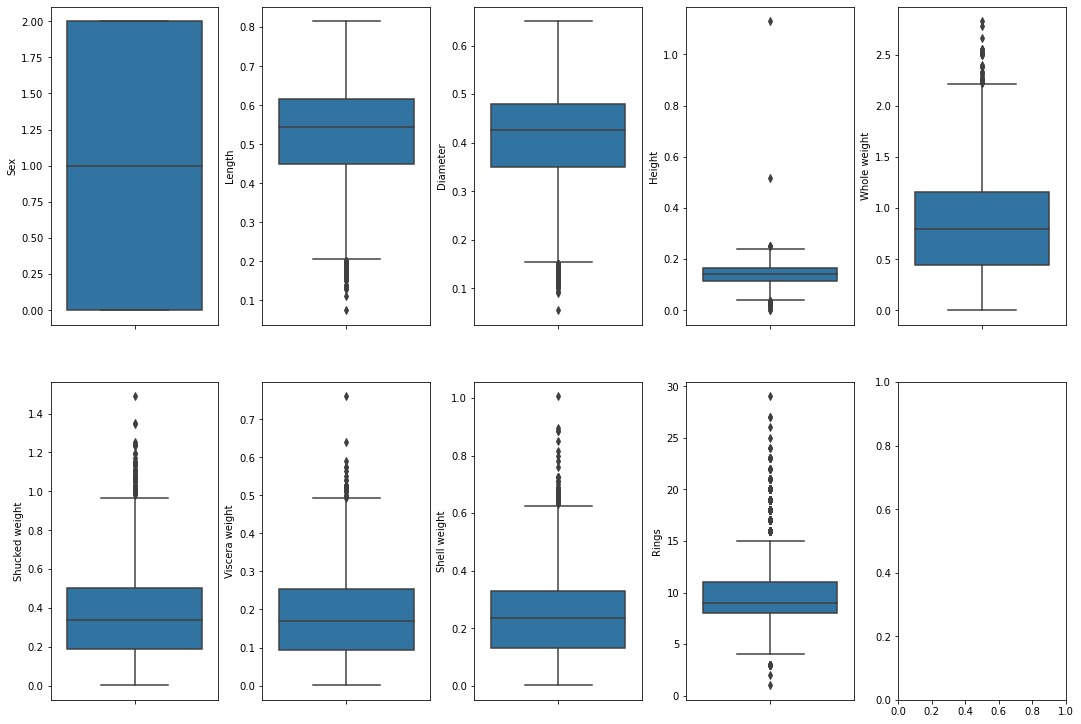

In [32]:
fig,ax=plt.subplots(ncols=5,nrows=2,figsize=(15,10))
index=0
ax=ax.flatten()

for col,value in df.items():
        sn.boxplot(y=col,data=df,ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

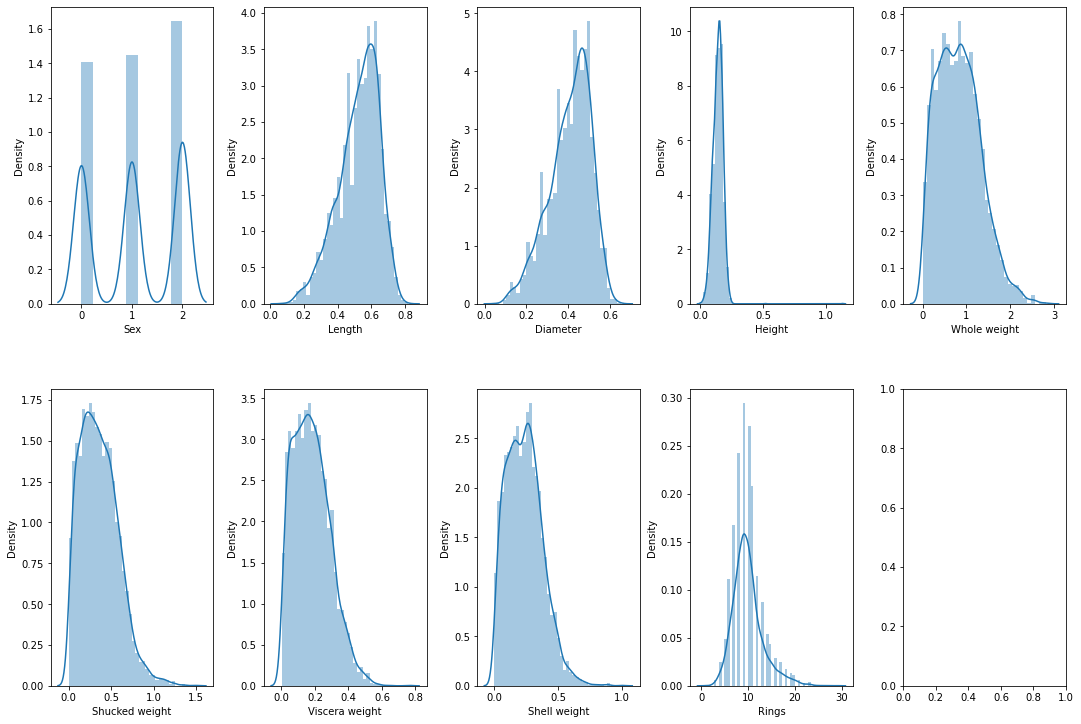

In [33]:
fig,ax=plt.subplots(ncols=5,nrows=2,figsize=(15,10))
index=0
ax=ax.flatten()

for col,value in df.items():
        sn.distplot(value,ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

<AxesSubplot:>

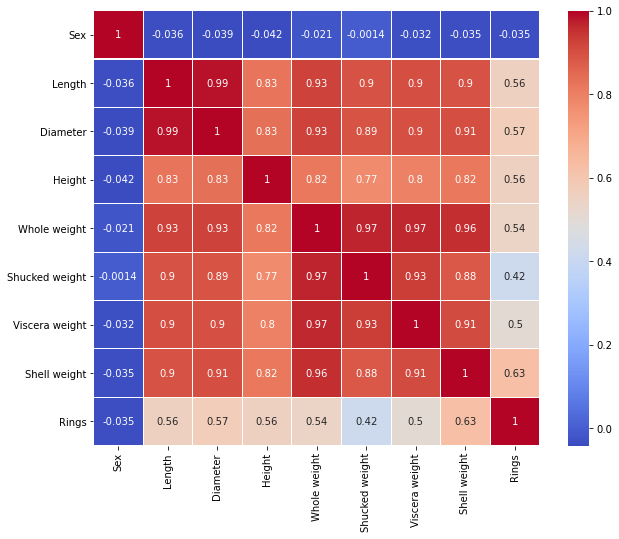

In [34]:
plt.figure(figsize=(10,8))
sn.heatmap(df.corr(),linewidths=.1,cmap="coolwarm", annot=True)

All the variables are somewhat correlated

In [35]:
from scipy.stats import zscore

In [36]:
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [37]:
df.shape

(4027, 9)

In [38]:
dataloss=((4177-4027)*100)/4177
dataloss

3.5910940866650707

Data loss is in acceptable region

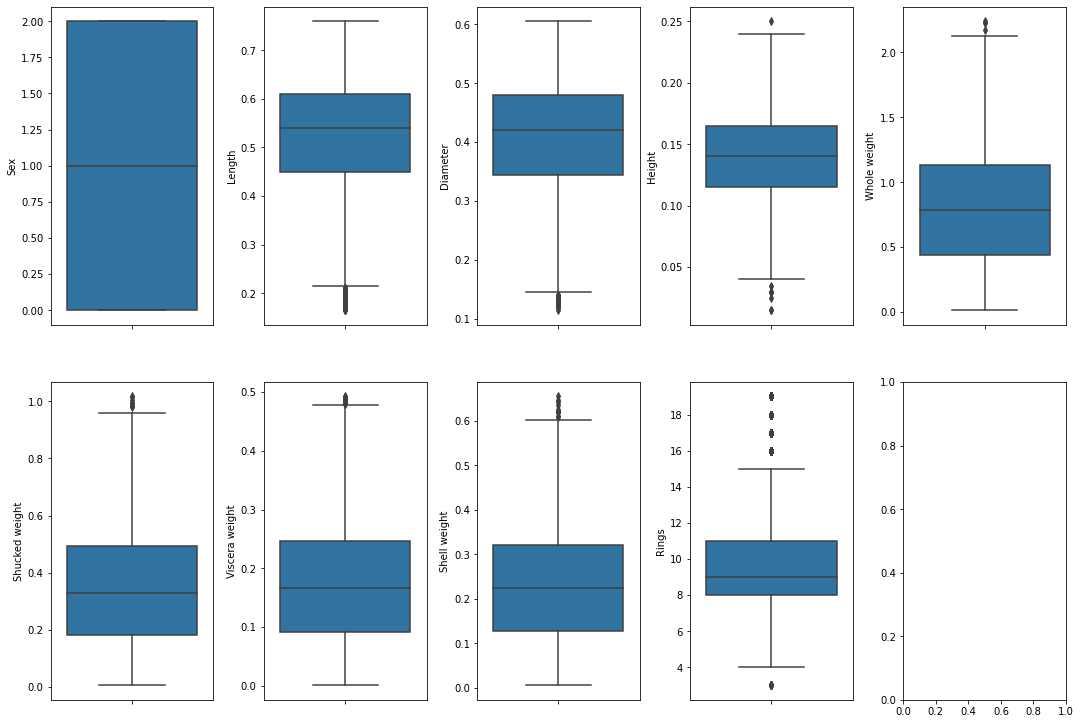

In [39]:
fig,ax=plt.subplots(ncols=5,nrows=2,figsize=(15,10))
index=0
ax=ax.flatten()

for col,value in df.items():
        sn.boxplot(y=col,data=df,ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

# Skewness

In [40]:
df.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

# Remove Skewness

# Length

In [41]:
from scipy.stats import boxcox

In [42]:
l=boxcox(df["Length"])[0]
pd.Series(l).skew()

-0.14176700690054567

In [43]:
df["alcohol"]=l

<AxesSubplot:xlabel='Length', ylabel='Density'>

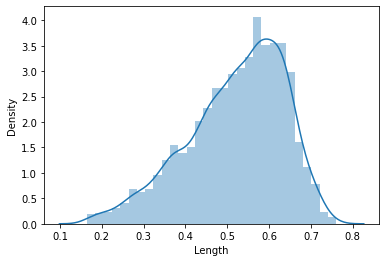

In [44]:
sn.distplot(df["Length"])

# Diameter

In [45]:
d=boxcox(df["Diameter"])[0]
pd.Series(d).skew()

-0.14898229523714548

In [46]:
df["Diameter"]=d

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

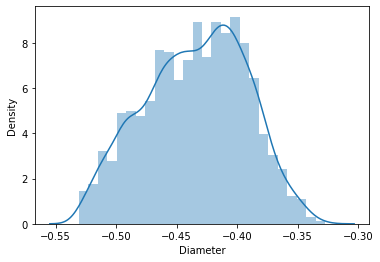

In [47]:
sn.distplot(df["Diameter"])

# Rings

In [48]:
r=boxcox(df["Rings"])[0]
pd.Series(r).skew()

0.008954440263157911

In [49]:
df["Rings"]=r

<AxesSubplot:xlabel='Rings', ylabel='Density'>

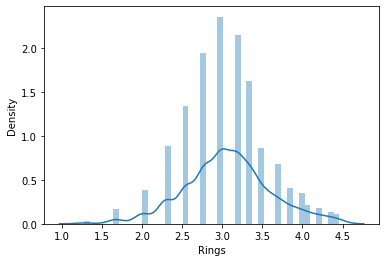

In [50]:
sn.distplot(df["Rings"])

# Input Splitting

In [51]:
x=df.drop(["Rings"],axis=1)

In [52]:
y=df["Rings"]

# Training Model and Splitting it into train and test

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [96]:
#classify function
from sklearn.model_selection import cross_val_score,train_test_split
def regress(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.50,random_state=7)
    #train the model
    model.fit(X_train,Y_train)
    ac=model.score(X_test,Y_test)*100
    print("R2:",ac)
    
    #cross validation
    score=cross_val_score(model,x,y,cv=5)
    cv=np.mean(score)*100
    print("CV Score:",cv)
    
    #diffrence between them
    print("Diffrence:",abs(ac-cv))

SyntaxError: invalid syntax (<ipython-input-96-257091a0d9a2>, line 4)

In [55]:
LR=LinearRegression()
regress(LR,x,y)

R2: 56.54016091789488
CV Score: 50.685987537011215
Diffrence: 5.854173380883665


In [56]:
DTR = DecisionTreeRegressor()
regress(DTR,x,y)

R2: 18.606253875946788
CV Score: 13.761800741687042
Diffrence: 4.844453134259746


In [57]:
RDG=Ridge()
regress(RDG,x,y)

R2: 52.53075022024021
CV Score: 47.45423859383894
Diffrence: 5.07651162640127


In [58]:
LSO=Lasso()
regress(LSO,x,y)

R2: -0.02652028948753049
CV Score: -12.72742991636541
Diffrence: 12.700909626877879


In [59]:
RFR=RandomForestRegressor()
regress(RFR,x,y)

R2: 58.33360184115595
CV Score: 53.94907110819391
Diffrence: 4.384530732962034


In [72]:
KNR=KNeighborsRegressor(n_neighbors=5, weights='distance')
regress(KNR,x,y)

R2: 53.62211257688485
CV Score: 51.19287965036353
Diffrence: 2.4292329265213226


# Hyper Parameter Tuning

In [80]:
from sklearn.model_selection import KFold

In [81]:
# Select an algorithm
algorithm = KNeighborsRegressor()

In [82]:
# Create 3 folds
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

In [83]:
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

In [87]:
# Search for best hyperparameters
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(x, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}],
             scoring='r2')

In [89]:
# Search for best hyperparameters
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(x, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}],
             scoring='r2')

In [90]:
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.5675620587891962
KNeighborsRegressor(n_neighbors=6, weights='distance')
{'n_neighbors': 6, 'weights': 'distance'}


# Now Running Again But With These Parameters

In [92]:
KNR=KNeighborsRegressor(n_neighbors=6, weights='distance')
regress(KNR,x,y)

R2: 54.597371926246716
CV Score: 52.26548792680783
Diffrence: 2.3318839994388867


In [99]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.50,random_state=7)
final_model=KNeighborsRegressor()
final_model.fit(X_train,Y_train)
temp=final_model.score(X_test,Y_test)
temp*100

53.41800902981011

In [100]:
import joblib
joblib.dump(final_model,r"C:\Users\Avinash\Desktop\Projects\P4=abalone\abalone.pkl")

['C:\\Users\\Avinash\\Desktop\\Projects\\P4=abalone\\abalone.pkl']